In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#── Load the data
data_frame = pd.read_csv(
    'https://raw.githubusercontent.com/SRIPATHIB9/PDS/refs/heads/main/diabetes.csv'
)

#Small random sample
seed_val  = 42
np.random.seed(seed_val)
sample_df = data_frame.sample(n=25, random_state=seed_val)

In [9]:

pop_gluc_mean  = data_frame['Glucose'].mean()
samp_gluc_mean = sample_df['Glucose'].mean()
pop_gluc_max   = data_frame['Glucose'].max()
samp_gluc_max  = sample_df['Glucose'].max()

pop_bmi_98     = np.percentile(data_frame['BMI'], 98)
samp_bmi_98    = np.percentile(sample_df['BMI'], 98)

# Bootstrap on BloodPressure
n_iters      = 500
bs_size      = 150
bp_mean_list = []
bp_std_list  = []
bp_pct_list  = []

for _ in range(n_iters):
    bs = data_frame['BloodPressure'].sample(n=bs_size, replace=True)
    bp_mean_list.append(bs.mean())
    bp_std_list.append(bs.std())
    bp_pct_list.append(np.percentile(bs, 98))

pop_bp_std   = data_frame['BloodPressure'].std()
pop_bp_98pct = np.percentile(data_frame['BloodPressure'], 98)

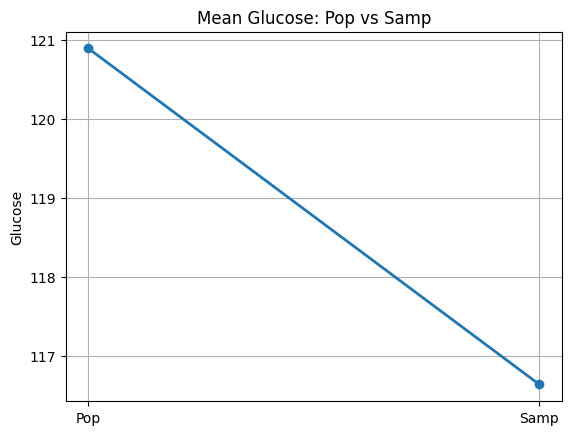

In [10]:
#1. Mean Glucose: Line Plot
plt.figure()
plt.plot([0, 1],
         [pop_gluc_mean, samp_gluc_mean],
         marker='o', linestyle='-', linewidth=2)
plt.xticks([0, 1], ['Pop', 'Samp'])
plt.title('Mean Glucose: Pop vs Samp')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

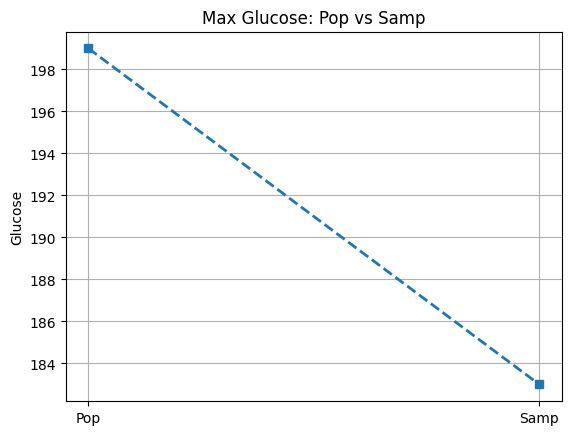

In [11]:
#2. Max Glucose
plt.figure()
plt.plot([0, 1],
         [pop_gluc_max, samp_gluc_max],
         marker='s', linestyle='--', linewidth=2)
plt.xticks([0, 1], ['Pop', 'Samp'])
plt.title('Max Glucose: Pop vs Samp')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

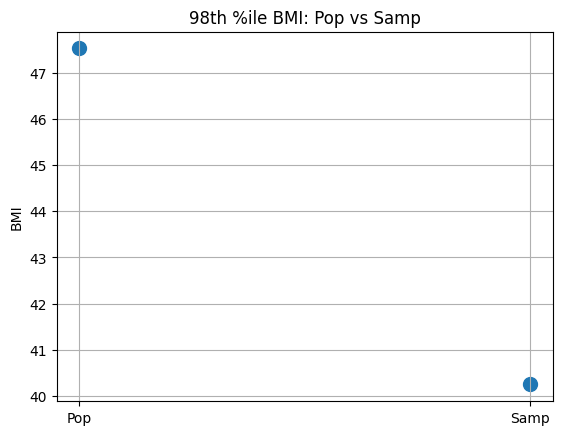

In [12]:
#98th Percentile BMI: Scatter Plot
plt.figure()
plt.scatter([0, 1], [pop_bmi_98, samp_bmi_98], s=100)
plt.xticks([0, 1], ['Pop', 'Samp'])
plt.title('98th %ile BMI: Pop vs Samp')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

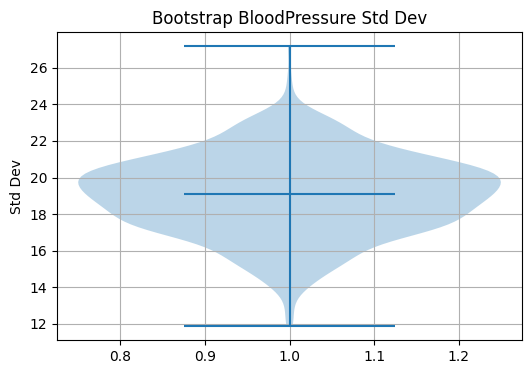

In [13]:
#4. Bootstrap BP Std Dev: Violin Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.violinplot(bp_std_list, showmeans=True)
ax.set_title('Bootstrap BloodPressure Std Dev')
ax.set_ylabel('Std Dev')
ax.grid(True)
plt.show()

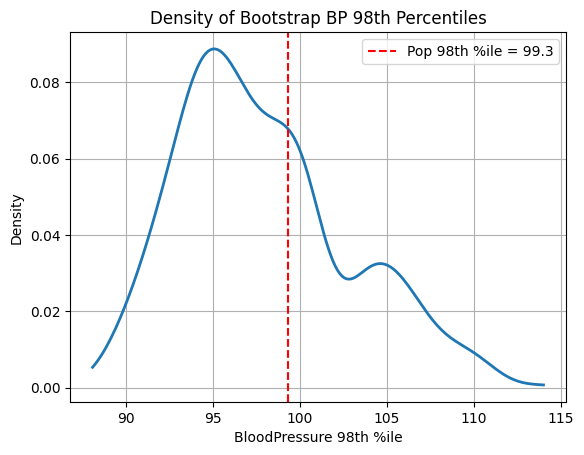

In [14]:
#Bootstrap BP 98th
xs = np.linspace(min(bp_pct_list), max(bp_pct_list), 200)
kde_vals = gaussian_kde(bp_pct_list)(xs)

plt.figure()
plt.plot(xs, kde_vals, lw=2)
plt.axvline(pop_bp_98pct,
            color='r', linestyle='--',
            label=f'Pop 98th %ile = {pop_bp_98pct:.1f}')
plt.title('Density of Bootstrap BP 98th Percentiles')
plt.xlabel('BloodPressure 98th %ile')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()